# FLIP (00): Data Science 
**(Module 01: Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

# Session 6 Case Study (I) - Classification


The purpose of this session is to demonstrate different coefficient and linear regression.


## Content

### Part 1 Linear Regression

1.1 [Linear Regression Package](#lrp)

1.2 [Evaluation](#eva)


### Part 2 Classificiation

2.1 [Skulls Dataset](#data)

2.2 [Data Preprocessing](#datapre)

2.3 [KNN](#knn)

2.4 [Decision Tree](#dt)

2.5 [Random Forest](#rf)



---
## <span style="color:#0b486b">1. Linear Regression</span>

<a id = "lrp"></a>


### <span style="color:#0b486b">1.1 Linear Regression Package</span>


We will learn how to use sklearn package to do linear regression

In [1]:
from sklearn.datasets import load_diabetes 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
%matplotlib inline

Now create an instance of the diabetes data set by using the <b>load_diabetes</b> function as a variable called <b>diabetes</b>.

In [2]:
diabetes = load_diabetes()

We will work with one feature only.

In [3]:
diabetes_X = diabetes.data[:, None, 2]

Now create an instance of the LinearRegression called LinReg.

In [4]:
LinReg = LinearRegression()

Now to perform <b>train/test split</b> we have to split the <b>X</b> and <b>y</b> into two different sets: The <b>training</b> and <b>testing</b> set. Luckily there is a sklearn function for just that!

Import the <b>train_test_split</b> from <b>sklearn.cross_validation</b>

In [5]:
#from sklearn.cross_validation import train_test_split  
#Cross has been abandoned in sklearn_ Validation, which integrates the contents into the model_ In selection
from sklearn.model_selection import train_test_split

Now <b>train_test_split</b> will return <b>4</b> different parameters. We will name this <b>X_trainset</b>, <b>X_testset</b>, <b>y_trainset</b>, <b>y_testset</b>. 

Now let's use <b>diabetes_X</b> as the <b>Feature Matrix</b> and <b>diabetes.target</b> as the <b>response vector</b> and split it up using <b>train_test_split</b> function we imported earlier (<i>If you haven't, please import it</i>). The <b>train_test_split</b> function should have <b>test_size = 0.3</b> and a <b>random state = 7</b>. 


The <b>train_test_split</b> will need the parameters <b>X</b>, <b>y</b>, <b>test_size=0.3</b>, and <b>random_state=7</b>. The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures we obtain the same splits.

In [6]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(diabetes_X, diabetes.target, test_size=0.3, random_state=7)

Train the <b>LinReg</b> model using <b>X_trainset</b> and <b>y_trainset</b>

In [7]:
LinReg.fit(X_trainset, y_trainset)

LinearRegression()

Now let's <i>plot</i> the graph.
<p> Use plt's <b>scatter</b> function to plot all the datapoints of <b>X_testset</b> and <b>y_testset</b> and color it <b>black</b> </p>
<p> Use plt's <b>plot</b> function to plot the line of best fit with <b>X_testset</b> and <b>LinReg.predict(X_testset)</b>. Color it <b>blue</b> with a <b>linewidth</b> of <b>3</b>. </p> <br>
<b>Note</b>: Please ignore the FutureWarning. 

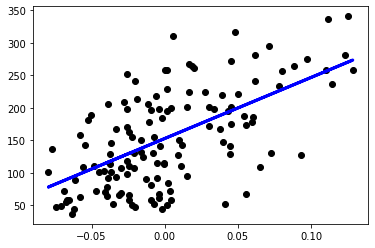

In [8]:
plt.scatter(X_testset, y_testset, color='black')
plt.plot(X_testset, LinReg.predict(X_testset), color='blue', linewidth=3)


<a id = "eva"></a>


### <span style="color:#0b486b">1.2 Evaluation</span>




In this part, you will learn the about the different evaluation models and metrics. You will be able to identify the strengths and weaknesses of each model and how to incorporate underfitting or overfilling them also referred to as the Bias-Variance trade-off.

In [9]:
import numpy as np
# from sklearn.preprocessing import StandardScaler

<br><b> Here's a list of useful functions: </b><br>
    mean -> np.mean()<br>
    exponent -> **<br>
    absolute value -> abs()
    
    
We use three evaluation metrics:

$$ MAE = \frac{\sum_{j=1}^n|y_i-\hat y_i|}{n} $$

$$ MSE = \frac{\sum_{j=1}^n (y_i-\hat y_i)^2}{n} $$

$$ RMSE = \sqrt{\frac{\sum_{j=1}^n (y_i-\hat y_i)^2}{n}} $$





In [10]:
# ss_X = StandardScaler()
# ss_y = StandardScaler()
# X_trainset = ss_X.fit_transform(X_trainset)
# X_testset = ss_X.transform(X_testset)
# y_trainset = ss_y.fit_transform(y_trainset)
# y_testset = ss_y.transform(y_testset)
print(np.mean(abs(LinReg.predict(X_testset) - y_testset)))

49.13321801160823


In [11]:
# ss_X = StandardScaler()
# ss_y = StandardScaler()
# X_trainset = ss_X.fit_transform(X_trainset)
# X_testset = ss_X.transform(X_testset)
# y_trainset = ss_y.fit_transform(y_trainset)
# y_testset = ss_y.transform(y_testset)
print(np.mean((LinReg.predict(X_testset) - y_testset) ** 2) )

3563.8152601287006


In [12]:
# ss_X = StandardScaler()
# ss_y = StandardScaler()
# X_trainset = ss_X.fit_transform(X_trainset)
# X_testset = ss_X.transform(X_testset)
# y_trainset = ss_y.fit_transform(y_trainset)
# y_testset = ss_y.transform(y_testset)
print(np.mean((LinReg.predict(X_testset) - y_testset) ** 2) ** (0.5) )

59.697698951707515


---
## <span style="color:#0b486b">2. Classification</span>

<a id = "cls"></a>



<a id = "data"></a>

### <span style="color:#0b486b">2.1 Skulls dataset</span>

In this section, we will take a closer look at a data set.

Everything starts off with how the data is stored. We will be working with .csv files, or comma separated value files. As the name implies, each attribute (or column) in the data is separated by commas.

Next, a little information about the dataset. We are using a dataset called skulls.csv, which contains the measurements made on Egyptian skulls from five epochs.

#### The attributes of the data are as follows: 

<img src = "image/Skull.png", align = 'left'>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<b>epoch</b> - The epoch the skull as assigned to, a factor with levels c4000BC c3300BC, c1850BC, c200BC, and cAD150, where the years are only given approximately.

<b>mb</b> - Maximal Breadth of the skull.

<b>bh</b> - Basiregmatic Heights of the skull.

<b>bl</b> - Basilveolar Length of the skull.

<b>nh</b> - Nasal Heights of the skull.

#### Importing Libraries

Before we begin, we need to import some libraries, as they have useful functions that will be used later on.<br>

If you look at the imports below, you will notice the return of **numpy**! Remember that numpy is homogeneous multidimensional array (ndarray).

In [13]:
import numpy as np
import pandas

---
We need the **pandas** library for a function to read .csv files
<ul>
    <li> <b>pandas.read_csv</b> - Reads data into DataFrame </li>
    <li> The read_csv function takes in <i>2 parameters</i>: </li>
    <ul>
        <li> The .csv file as the first parameter </li>
        <li> The delimiter as the second parameter </li>
    </ul>
</ul>

-----------------------------
Save the "<b> skulls.csv </b>" data file into a variable called <b> my_data </b>  

In [14]:
#Note！！！！！！！！！！！！！！！！！！: change to your local file location
my_data = pandas.read_csv("D:/filp/filp00/Notebook/Data/skulls.csv", delimiter=",")
my_data.describe()

,Unnamed: 0,mb,bh,bl,nh
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,133.973333,132.546667,96.460000,50.933333
std,43.445368,4.890680,4.939346,5.377844,3.207932
min,1.000000,119.000000,120.000000,81.000000,44.000000
25%,38.250000,131.000000,129.000000,93.000000,49.000000
50%,75.500000,134.000000,133.000000,96.000000,51.000000
75%,112.750000,137.000000,136.000000,100.000000,53.000000
max,150.000000,148.000000,145.000000,114.000000,60.000000


Print out the data in <b> my_data </b>  

In [15]:
print (my_data)

     Unnamed: 0    epoch   mb   bh   bl  nh
0             1  c4000BC  131  138   89  49
1             2  c4000BC  125  131   92  48
2             3  c4000BC  131  132   99  50
3             4  c4000BC  119  132   96  44
4             5  c4000BC  136  143  100  54
..          ...      ...  ...  ...  ...  ..
145         146   cAD150  137  125   85  57
146         147   cAD150  129  128   81  52
147         148   cAD150  140  135  103  48
148         149   cAD150  147  129   87  48
149         150   cAD150  136  133   97  51

[150 rows x 6 columns]


Check the type of <b> my_data </b>

In [16]:
print(type(my_data))

<class 'pandas.core.frame.DataFrame'>


-----------
There are various functions that the **pandas** library has to look at the data
<ul>
    <li> <font color = "red"> [DataFrame Data].columns </font> - Displays the Header of the Data </li>
    <ul> 
        <li> Type: pandas.indexes.base.Index </li>
    </ul>
</ul>

<ul>
    <li> <font color = "red"> [DataFrame Data].values </font> (or <font color = "red"> [DataFrame Data].as_matrix() </font>) - Displays the values of the data (without headers) </li>
    <ul>
        <li> Type: numpy.ndarray </li>
    </ul>
</ul>

<ul>
    <li> <font color = "red"> [DataFrame Data].shape </font> - Displays the dimensions of the data (rows x columns) </li>
    <ul>
        <li> Type: tuple </li>
    </ul>
</ul>

----------
Using the <b> my_data </b> variable containing the DataFrame data, retrieve the <b> header </b> data, data <b> values </b>, and <b> shape </b> of the data. 

In [17]:
print (my_data.columns)

Index(['Unnamed: 0', 'epoch', 'mb', 'bh', 'bl', 'nh'], dtype='object')


In [18]:
print (my_data.values)

[[1 'c4000BC' 131 138 89 49]
 [2 'c4000BC' 125 131 92 48]
 [3 'c4000BC' 131 132 99 50]
 [4 'c4000BC' 119 132 96 44]
 [5 'c4000BC' 136 143 100 54]
 [6 'c4000BC' 138 137 89 56]
 [7 'c4000BC' 139 130 108 48]
 [8 'c4000BC' 125 136 93 48]
 [9 'c4000BC' 131 134 102 51]
 [10 'c4000BC' 134 134 99 51]
 [11 'c4000BC' 129 138 95 50]
 [12 'c4000BC' 134 121 95 53]
 [13 'c4000BC' 126 129 109 51]
 [14 'c4000BC' 132 136 100 50]
 [15 'c4000BC' 141 140 100 51]
 [16 'c4000BC' 131 134 97 54]
 [17 'c4000BC' 135 137 103 50]
 [18 'c4000BC' 132 133 93 53]
 [19 'c4000BC' 139 136 96 50]
 [20 'c4000BC' 132 131 101 49]
 [21 'c4000BC' 126 133 102 51]
 [22 'c4000BC' 135 135 103 47]
 [23 'c4000BC' 134 124 93 53]
 [24 'c4000BC' 128 134 103 50]
 [25 'c4000BC' 130 130 104 49]
 [26 'c4000BC' 138 135 100 55]
 [27 'c4000BC' 128 132 93 53]
 [28 'c4000BC' 127 129 106 48]
 [29 'c4000BC' 131 136 114 54]
 [30 'c4000BC' 124 138 101 46]
 [31 'c3300BC' 124 138 101 48]
 [32 'c3300BC' 133 134 97 48]
 [33 'c3300BC' 138 134 98 45]
 [

In [19]:
print (my_data.shape)

(150, 6)


<a id = "datapre"></a>

### <span style="color:#0b486b">2.2 Data Preprocessing</span>

When we train a model, the model requires two inputs, X and y
<ul>
    <li> X: Feature Matrix, or array that contains the data. </li>
    <li> y: Response Vector, or 1-D array that contains the classification categories </li>
</ul>



------------
There are some problems with the data in my_data:
<ul>
    <li> There is a header on the data (Unnamed: 0    epoch   mb   bh   bl  nh) </li>
    <li> The data needs to be in numpy.ndarray format in order to use it in the machine learning model </li>
    <li> There is non-numeric data within the dataset </li>
    <li> There are row numbers associated with each row that affect the model </li>
</ul>

To resolve these problems, I have created a function that fixes these for us:
<b> removeColumns(pandasArray, column) </b>

This function produces one output and requires two inputs.
<ul>
    <li> 1st Input: A pandas array. The pandas array we have been using is my_data </li>
    <li> 2nd Input: Any number of integer values (order doesn't matter) that represent the columns that we want to remove. (Look at the data again and find which column contains the non-numeric values). We also want to remove the first column because that only contains the row number, which is irrelevant to our analysis.</li>
    <ul>
        <li> Note: Remember that Python is zero-indexed, therefore the first column would be 0. </li>
    </ul>
</ul>



In [20]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

---------
Using the function, store the values from the DataFrame data into a variable called new_data. 

In [21]:
new_data = removeColumns(my_data, 0, 1)

D:\filp\filp00\anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexes\base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Print out the data in <b> new_data </b>

In [22]:
print(new_data)


[[131 138  89  49]
 [125 131  92  48]
 [131 132  99  50]
 [119 132  96  44]
 [136 143 100  54]
 [138 137  89  56]
 [139 130 108  48]
 [125 136  93  48]
 [131 134 102  51]
 [134 134  99  51]
 [129 138  95  50]
 [134 121  95  53]
 [126 129 109  51]
 [132 136 100  50]
 [141 140 100  51]
 [131 134  97  54]
 [135 137 103  50]
 [132 133  93  53]
 [139 136  96  50]
 [132 131 101  49]
 [126 133 102  51]
 [135 135 103  47]
 [134 124  93  53]
 [128 134 103  50]
 [130 130 104  49]
 [138 135 100  55]
 [128 132  93  53]
 [127 129 106  48]
 [131 136 114  54]
 [124 138 101  46]
 [124 138 101  48]
 [133 134  97  48]
 [138 134  98  45]
 [148 129 104  51]
 [126 124  95  45]
 [135 136  98  52]
 [132 145 100  54]
 [133 130 102  48]
 [131 134  96  50]
 [133 125  94  46]
 [133 136 103  53]
 [131 139  98  51]
 [131 136  99  56]
 [138 134  98  49]
 [130 136 104  53]
 [131 128  98  45]
 [138 129 107  53]
 [123 131 101  51]
 [130 129 105  47]
 [134 130  93  54]
 [137 136 106  49]
 [126 131 100  48]
 [135 136  9

-------
Now, we have one half of the required data to fit a model, which is X or new_data

Next, we need to get the response vector y. Since we cannot use .target and .target_names, I have created a function that will do this for us.

<b> targetAndtargetNames(numpyArray, targetColumnIndex) </b>

This function produces two outputs, and requires two inputs.
<ul>
    <li> <font size = 3.5><b><i>1st Input</i></b></font>: A numpy array. The numpy array you will use is my_data.values (or my_data.as_matrix())</li>
    <ul>
        <li> Note: DO NOT USE <b> new_data </b> here. We need the original .csv data file without the headers </li>
    </ul>
</ul>
<ul>
    <li> <font size = 3.5><b><i>2nd Input</i></b></font>: An integer value that represents the target column . (Look at the data again and find which column contains the non-numeric values. This is the target column)</li>
    <ul>
        <li> Note: Remember that Python is zero-indexed, therefore the first column would be 0. </li>
   </ul>
</ul>

<ul>
    <li> <font size = 3.5><b><i>1st Output</i></b></font>: The response vector (target) </li>
    <li> <font size = 3.5><b><i>2nd Output</i></b></font>: The target names (target_names) </li>
</ul>




In [23]:
def targetAndtargetNames(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    target_names = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    # Since a dictionary is not ordered, we need to order it and output it to a list so the
    # target names will match the target.
    for targetName in sorted(target_dict, key=target_dict.get):
        target_names.append(targetName)
    return np.asarray(target), target_names

Using the targetAndtargetNames function, create two variables called <b>target</b> and <b>target_names</b>

In [24]:
y, targetNames = targetAndtargetNames(my_data, 1)

Print out the <b>y</b> and <b>targetNames</b> variables you created.

In [25]:
print(y)
print(targetNames)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']


Now that we have the two required variables to fit the data, a sneak peak at how to fit data will be shown in the cell below.



<a id = "knn"></a>

### <span style="color:#0b486b">2.3 KNN</span>

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

#### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "image/KNN.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

In [26]:
# X = removeColumns(my_data, 0, 1)
# y = target(my_data, 1)

X = new_data

print (X.shape)
print (y.shape)



(150, 4)
(150,)


Now to perform <b>train/test split</b> we have to split the <b>X</b> and <b>y</b> into two different sets: The <b>training</b> and <b>testing</b> set. Luckily there is a sklearn function for just that!

Import the <b>train_test_split</b> from <b>sklearn.cross_validation</b>

In [27]:
#from sklearn.cross_validation import train_test_split
#Cross has been abandoned in sklearn_ Validation, which integrates the contents into the model_ In selection
from sklearn.model_selection import train_test_split

Now <b>train_test_split</b> will return <b>4</b> different parameters. We will name this <b>X_trainset</b>, <b>X_testset</b>, <b>y_trainset</b>, <b>y_testset</b>. The <b>train_test_split</b> will need the parameters <b>X</b>, <b>y</b>, <b>test_size=0.3</b>, and <b>random_state=7</b>. The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures we obtain the same splits.

In [28]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=7)

Now let's print the shape of the training sets to see if they match.

In [29]:
print (X_trainset.shape)
print (y_trainset.shape)

(105, 4)
(105,)


Let's check the same with the testing sets! They should both match up!

In [30]:
print (X_testset.shape)
print (y_testset.shape)

(45, 4)
(45,)


Now similarly with the last lab, let's create declarations of KNeighborsClassifier. Except we will create 3 different ones:

- neigh -> n_neighbors = 1 
- neigh23 -> n_neighbors = 23 
- neigh90 -> n_neighbors = 90 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 1)
neigh23 = KNeighborsClassifier(n_neighbors = 23)
neigh90 = KNeighborsClassifier(n_neighbors = 90)

Now we will fit each instance of <b>KNeighborsClassifier</b> with the <b>X_trainset</b> and <b>y_trainset</b>

In [32]:
neigh.fit(X_trainset, y_trainset)
neigh23.fit(X_trainset, y_trainset)
neigh90.fit(X_trainset, y_trainset)

KNeighborsClassifier(n_neighbors=90)

Now you are able to predict with <b>multiple</b> datapoints. We can do this by just passing in the <b>y_testset</b> which contains multiple test points into a <b>predict</b> function of <b>KNeighborsClassifier</b>.

Let's pass the <b>y_testset</b> in the <b>predict</b> function each instance of <b>KNeighborsClassifier</b> but store it's returned value into <b>pred</b>, <b>pred23</b>, <b>pred90</b> (corresponding to each of their names)



In [33]:
pred = neigh.predict(X_testset)
pred23 = neigh23.predict(X_testset)
pred90 = neigh90.predict(X_testset)

Awesome! Now let's compute neigh's <b>prediction accuracy</b>. We can do this by using the <b>metrics.accuracy_score</b> function

In [34]:
from sklearn import metrics
print("Neigh's Accuracy: "), metrics.accuracy_score(y_testset, pred)

Neigh's Accuracy: 


(None, 0.2222222222222222)

Interesting! Let's do the same for the other instances of KNeighborsClassifier.

In [35]:
print("Neigh23's Accuracy: "), metrics.accuracy_score(y_testset, pred23)
print("Neigh90's Accuracy: "), metrics.accuracy_score(y_testset, pred90)

Neigh23's Accuracy: 
Neigh90's Accuracy: 


(None, 0.13333333333333333)

As shown, the accuracy of <b>neigh23</b> is the highest. When <b>n_neighbors = 1</b>, the model was <b>overfit</b> to the training data (<i>too specific</i>) and when <b>n_neighbors = 90</b>, the model was <b>underfit</b> (<i>too generalized</i>). In comparison, <b>n_neighbors = 23</b> had a <b>good balance</b> between <b>Bias</b> and <b>Variance</b>, creating a generalized model that neither <b>underfit</b> the data nor <b>overfit</b> it.

<a id = "dt"></a>

### <span style="color:#0b486b">2.4 Decision Tree</span>

In this section, you will learn <b>decision trees</b> and <b>random forests</b>. 

The <b> getFeatureNames </b> is a function made to get the attribute names for specific columns

This function produces one output and requires two inputs:
<ul>
    <li> <b>1st Input</b>: A pandas array. The pandas array we have been using is <b>my_data</b>. </li>
    <li> <b>2nd Input</b>: Any number of integer values (order doesn't matter) that represent the columns that we want to include. In our case we want <b>columns 2-5</b>. </li>
    <ul> <li> Note: Remember that Python is zero-indexed, therefore the first column would be 0. </li> </ul>

In [36]:
def getFeatureNames(pandasArray, *column):
    actualColumns = list()
    allColumns = list(pandasArray.columns.values)
    for i in sorted(column):
        actualColumns.append(allColumns[i])
    return actualColumns

Now we prepare the data for decision tree construction.


In [37]:
#X = removeColumns(my_data, 0, 1) 
#y, targetNames = targetAndtargetNames(my_data, 1) 
featureNames = getFeatureNames(my_data, 2,3,4,5)

Print out <b>y</b>, <b>targetNames</b>, and <b>featureNames</b> to use in the next example. Remember that the numbers correspond to the names, 0 being the first name,1 being the second name, and so on.

In [38]:
print (y) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]


In [39]:
print (targetNames) 

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']


In [40]:
print (featureNames)

['mb', 'bh', 'bl', 'nh']


We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>skullsTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
skullsTree = DecisionTreeClassifier(criterion="entropy")

In [43]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [44]:
predTree = skullsTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [45]:
print (predTree)
print (y_testset)

[1 2 2 4 1 0 1 2 4 1 4 4 1 1 1 3 1 2 3 1 4 3 0 3 1 3 2 3 1 2 1 4 4 4 0 2 0
 3 3 2 2 0 3 1 4]
[4 2 1 2 3 1 1 3 0 1 2 2 1 3 0 2 3 4 1 1 2 4 2 3 4 4 3 2 3 4 4 2 0 4 2 1 1
 0 0 3 4 2 4 3 3]


Next, let's import metrics from sklearn and check the accuracy of our model.

In [46]:
from sklearn import metrics
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy: 


(None, 0.15555555555555556)

Now we can visualize the tree constructed.

However, it should be noted that the following code may not work in all Python2 environment. You can try to see packages like <b>pydot</b>, <b>pydot2</b>, <b>pydot2</b>, <b>pydotplus</b>, etc., and see which one works in your platform.

In [47]:
#!pip install pydotplus
!pip install pydot2

#conda install pydot2

In [65]:
from IPython.display import Image  
from six import StringIO
from sklearn import tree
import pydot
#import pydotplus

dot_data = StringIO()  

tree.export_graphviz(skullsTree, out_file=dot_data, 
feature_names=featureNames, 
class_names=targetNames, 
filled=True, rounded=True, 
special_characters=True, 
leaves_parallel=True)

graph= pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

AttributeError: 'list' object has no attribute 'create_png'

<a id = "rf"></a>

### <span style="color:#0b486b">2.5 Random Forest</span>

Import the <b>RandomForestClassifier</b> class from <b>sklearn.ensemble</b>

In [51]:
from sklearn.ensemble import RandomForestClassifier

Create an instance of the <b>RandomForestClassifier()</b> called <b>skullsForest</b>, where the forest has <b>10 decision tree estimators</b> (<i>n_estimators=10</i>) and the <b>criterion is entropy</b> (<i>criterion="entropy"</i>)

In [52]:
skullsForest=RandomForestClassifier(n_estimators=10, criterion="entropy")

Let's use the same <b>X_trainset</b>, <b>y_trainset</b> datasets that we made when dealing with the <b>Decision Trees</b> above to fit <b>skullsForest</b>.
<br> <br>
<b>Note</b>: Make sure you have ran through the Decision Trees section.

In [53]:
skullsForest.fit(X_trainset, y_trainset)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Let's now create a variable called <b>predForest</b> using a predict on <b>X_testset</b> with <b>skullsForest</b>.

In [54]:
predForest = skullsForest.predict(X_testset)

You can print out <b>predForest</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [55]:
print (predForest) 
print (y_testset)

[3 2 1 4 2 0 1 1 3 0 4 4 1 1 1 3 1 4 3 0 3 2 0 3 4 1 2 3 1 2 2 4 4 4 0 4 0
 3 3 0 3 0 1 1 1]
[4 2 1 2 3 1 1 3 0 1 2 2 1 3 0 2 3 4 1 1 2 4 2 3 4 4 3 2 3 4 4 2 0 4 2 1 1
 0 0 3 4 2 4 3 3]


Let's check the accuracy of our model. <br>

Note: Make sure you have metrics imported from sklearn

In [56]:
print("RandomForests's Accuracy: "), metrics.accuracy_score(y_testset, predForest)

RandomForests's Accuracy: 


(None, 0.17777777777777778)

We can also see what trees are in our <b> skullsForest </b> variable by using the <b> .estimators_ </b> attribute. This attribute is indexable, so we can look at any individual tree we want.

In [57]:
print(skullsForest.estimators_)

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1138831049), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=89552963), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1172072420), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=864324396), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=656040751), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1225253542), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1640145679), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=670150349), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       rand

You can choose to view any tree by using the code below. Replace the <i>"&"</i> in <b>skullsForest[&]</b> with the tree you want to see.

The following block may not work in your Python enrionment.

In [58]:
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from six import StringIO  
import pydot
from sklearn import tree
dot_data = StringIO()

#Replace the '&' below with the tree number
tree.export_graphviz(skullsForest[1], out_file=dot_data,
                     feature_names=featureNames,
                     class_names=targetNames,
                     filled=True, rounded=True,
                     special_characters=True,
                     leaves_parallel=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

AttributeError: 'list' object has no attribute 'create_png'